In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

In [2]:
fifa = pd.read_csv("data.csv")

fifa = fifa.drop(fifa[['Photo', 'Flag', 'Club Logo', 'Unnamed: 0', 'ID']], axis =1) #dropping irrelevant columns
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [3]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GK

In [4]:
fifa['Height'] = fifa['Height'].str.split("'").str[0].fillna(0).astype(int).apply(
    lambda x: x * 0.3048 *100) + fifa['Height'].str.split("'").str[1].fillna(0).astype(int).apply(lambda x: x * 0.0254*100)
fifa['Height'].head()

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height, dtype: float64

In [5]:
fifa['Height'] = fifa['Height'].apply(lambda x: x / 100)

In [6]:
fifa['Weight']= fifa.Weight.str.replace('lbs', '').astype('float').apply(lambda x: x *0.453592)

In [7]:
fifa['Weight'].head()

0    72.121128
1    83.007336
2    68.038800
3    76.203456
4    69.853168
Name: Weight, dtype: float64

In [8]:
fifa['BMI'] = fifa['Weight'] / (fifa['Height'] **2)
fifa['BMI'].head()

0    24.902645
1    23.495549
2    22.150882
3    20.449376
4    21.478402
Name: BMI, dtype: float64

In [9]:
fifa.BMI.describe()

count    18159.000000
mean        22.889444
std          1.408545
min         16.947609
25%         22.031768
50%         22.813872
75%         23.775280
max         34.866483
Name: BMI, dtype: float64

<AxesSubplot: xlabel='BMI', ylabel='Count'>

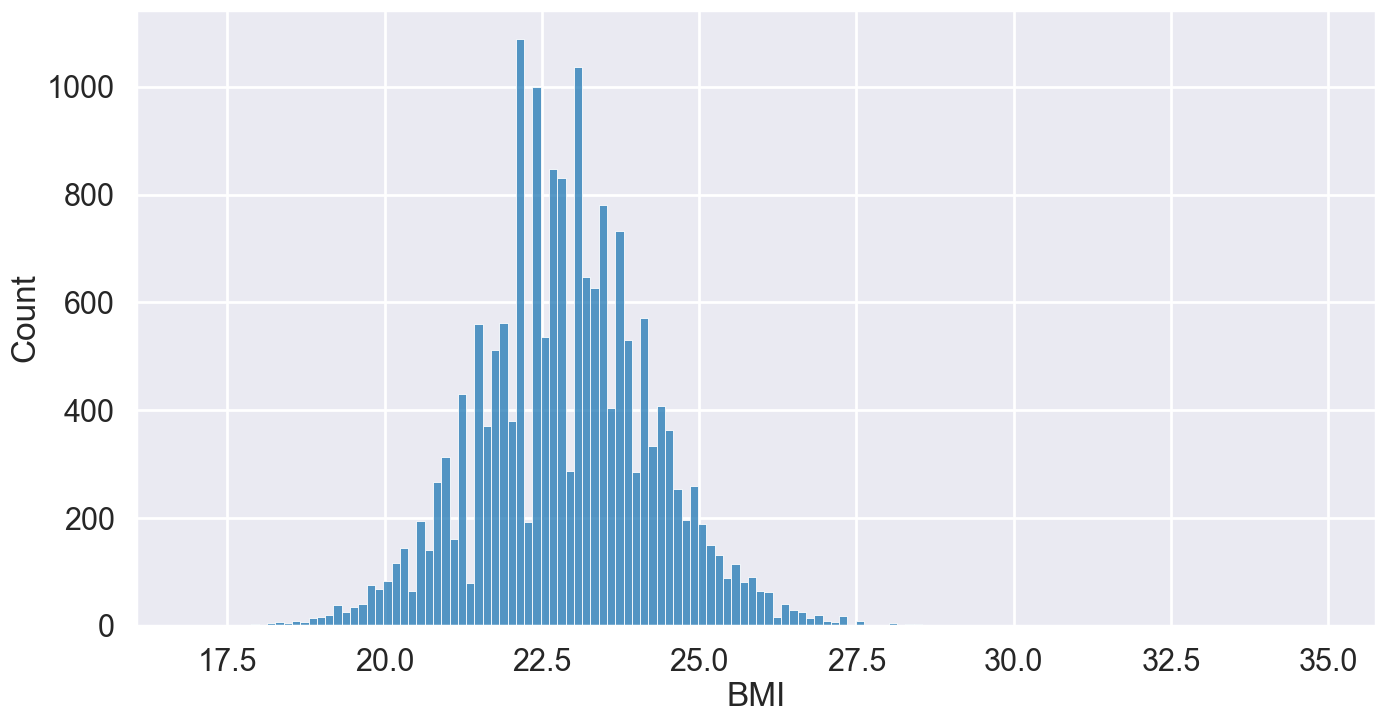

In [10]:
sns.set_context('poster')
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))

sns.histplot(data=fifa, x='BMI')

In [11]:
px.histogram(data_frame=fifa, x='BMI')

In [23]:
fifa.sample()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,BMI
7892,T. Taguchi,27,Japan,67,68,Júbilo Iwata,€850K,€3K,1767,Right,1.0,3.0,3.0,High/ Medium,Lean,No,LCM,7.0,"Jan 4, 2018",NaN,2021,1.7526,69.853168,59+2,59+2,59+2,65+2,63+2,63+2,63+2,65+2,65+2,65+2,65+2,66+2,66+2,66+2,66+2,66+2,63+2,61+2,61+2,61+2,63+2,61+2,55+2,55+2,55+2,61+2,60.0,52.0,40.0,68.0,45.0,66.0,63.0,65.0,62.0,68.0,71.0,74.0,81.0,67.0,69.0,55.0,65.0,86.0,63.0,65.0,40.0,57.0,58.0,68.0,48.0,57.0,45.0,61.0,52.0,10.0,6.0,9.0,13.0,15.0,€1.1M,22.741573


In [28]:
fifa[fifa.Position.isin['ST', 'GK', 'CB', 'CM', 'RW', 'LW']]]

TypeError: 'method' object is not subscriptable

In [30]:
px.strip(data_frame=fifa[fifa.Position.isin(['ST', 'GK', 'CB', 'CM', 'RW', 'LW'])], 
y='BMI', hover_name='Name', color='Position')

In [20]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GK

In [24]:
fifa.sort_values(by="BMI", ascending=True)


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,BMI
11479,A. Al Shammari,24,Saudi Arabia,64,70,Al Ittihad,€525K,€6K,1533,Left,1.0,3.0,2.0,Low/ Medium,Lean,No,CB,4.0,"Jun 9, 2018",NaN,2021,1.8796,59.874144,48+2,48+2,48+2,49+2,48+2,48+2,48+2,49+2,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,60+2,59+2,59+2,59+2,60+2,61+2,63+2,63+2,63+2,61+2,52.0,33.0,61.0,57.0,34.0,49.0,40.0,38.0,43.0,54.0,56.0,63.0,62.0,62.0,54.0,48.0,67.0,65.0,70.0,41.0,61.0,63.0,36.0,40.0,33.0,51.0,60.0,68.0,65.0,10.0,14.0,14.0,9.0,11.0,€998K,16.947609
12318,B. Niasse,21,Senegal,63,71,KAS Eupen,€400K,€1K,878,Right,1.0,3.0,1.0,Medium/ Medium,Lean,No,GK,30.0,"Feb 1, 2015",NaN,2019,1.9558,64.863656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,8.0,10.0,27.0,8.0,13.0,11.0,12.0,22.0,11.0,24.0,36.0,37.0,58.0,26.0,15.0,56.0,27.0,38.0,9.0,18.0,6.0,4.0,34.0,17.0,31.0,11.0,14.0,10.0,74.0,60.0,56.0,51.0,65.0,€680K,16.957137
15799,A. Grijalva,17,Mexico,59,73,Monterrey,€280K,€2K,1332,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,CB,38.0,"Jul 1, 2018",NaN,2021,1.7780,54.884632,39+2,39+2,39+2,35+2,35+2,35+2,35+2,35+2,33+2,33+2,33+2,37+2,36+2,36+2,36+2,37+2,50+2,48+2,48+2,48+2,50+2,53+2,57+2,57+2,57+2,53+2,34.0,28.0,69.0,33.0,34.0,31.0,27.0,28.0,30.0,35.0,55.0,57.0,48.0,48.0,79.0,45.0,70.0,61.0,53.0,20.0,62.0,55.0,25.0,29.0,39.0,40.0,54.0,66.0,68.0,6.0,9.0,13.0,14.0,7.0,€651K,17.361500
17468,B. Crellin,18,England,54,74,Fleetwood Town,€110K,€1K,864,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,31.0,"Dec 12, 2016",NaN,2020,1.8542,59.874144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,7.0,13.0,19.0,6.0,6.0,14.0,11.0,28.0,12.0,34.0,31.0,31.0,42.0,46.0,20.0,61.0,24.0,52.0,6.0,17.0,6.0,4.0,33.0,17.0,34.0,17.0,13.0,11.0,55.0,52.0,55.0,52.0,56.0,€303K,17.415108
13338,B. Al Mutairi,28,Saudi Arabia,62,62,Al Batin,€240K,€3K,1522,Left,1.0,3.0,2.0,High/ Medium,Lean,No,LB,3.0,"Jul 1, 2011",NaN,2021,1.6764,49.895120,44+2,44+2,44+2,53+2,49+2,49+2,49+2,53+2,50+2,50+2,50+2,56+2,51+2,51+2,51+2,56+2,61+2,55+2,55+2,55+2,61+2,61+2,55+2,55+2,55+2,61+2,61.0,22.0,41.0,53.0,20.0,55.0,57.0,33.0,41.0,55.0,83.0,83.0,75.0,52.0,73.0,20.0,70.0,84.0,57.0,29.0,55.0,54.0,51.0,43.0,37.0,42.0,58.0,61.0,56.0,7.0,6.0,13.0,8.0,9.0,€396K,17.754268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13279,P. Mazzocchi,22,Italy,62,69,Perugia,€350K,€1K,1681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13280,Y. Ammour,19,France,62,77,Montpellier HSC,€650K,€2K,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N